__<h1 align = "center">VISUALIZING DATA</h1>__

__<h1 align = "center">LAB 02: Visualizing data Time Series</h1>__

---

### __Thông tin nhóm__

> Nhóm 14

<table>
    <tr>
        <th>STT</th>
        <th>MSSV</th>
        <th>Họ và tên</th>
    </tr>
    <tr>
        <th>1</th>
        <th>20120040</th>
        <th>Nguyễn Quang Gia Bảo</th>
    </tr>
    <tr>
        <th>2</th>
        <th>20120120</th>
        <th>Nguyễn Việt Khoa</th>
    </tr>
    <tr>
        <th>3</th>
        <th>20120136</th>
        <th>Huỳnh Tuấn Nam</th>
    </tr>
    <tr>
        <th>4</th>
        <th>20120158</th>
        <th>Trần Hoàng Anh Phi</th>
    </tr>
</table>

### __Dataset's Infomation__

<table>
    <tr>
        <th>STT</th>
        <th></th>
        <th></th>
    </tr>
    <tr>
        <th>1</th>
        <th>Tên dataset</th>
        <th></th>
    </tr>
    <tr>
        <th>2</th>
        <th>Nội dung của dataset</th>
        <th></th>
    </tr>
    <tr>
        <th>3</th>
        <th>Ngày đăng/ cập nhật</th>
        <th></th>
    </tr>
    <tr>
        <th>4</th>
        <th>Giấy phép</th>
        <th></th>
    </tr>
    <tr>
        <th>5</th>
        <th>Đường link trên Kaggle</th>
        <th><a href = 'https://www.kaggle.com/datasets/farazrahman/earthquake'>https://www.kaggle.com/datasets/farazrahman/earthquake</a></th>
    </tr>
    <tr>
        <th>6</th>
        <th>Đường link trên Google Drive (csv)</th>
        <th></th>
    </tr>
    <tr>
        <th>7</th>
        <th>Lí do sử dụng dataset</th>
        <th></th>
    </tr>
</table>

## __Install Package__

## __Import Package__

In [2]:
import numpy as np
import pandas as pd
import plotly as pl
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## __Dataset Path__

In [3]:
__path__ = "./csv/crime.csv"

## __Read dataset__

In [4]:
df = pd.read_csv(__path__)

## __Display the head of dataset__

In [5]:
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Location 1,Total Incidents
0,11/12/2016,02:35:00,3B,300 SAINT PAUL PL,ROBBERY - STREET,O,NaN,111.0,CENTRAL,Downtown,"(39.2924100000, -76.6140800000)",1
1,11/12/2016,02:56:00,3CF,800 S BROADWAY,ROBBERY - COMMERCIAL,I,FIREARM,213.0,SOUTHEASTERN,Fells Point,"(39.2824200000, -76.5928800000)",1
2,11/12/2016,03:00:00,6D,1500 PENTWOOD RD,LARCENY FROM AUTO,O,NaN,413.0,NORTHEASTERN,Stonewood-Pentwood-Winston,"(39.3480500000, -76.5883400000)",1
3,11/12/2016,03:00:00,6D,6600 MILTON LN,LARCENY FROM AUTO,O,NaN,424.0,NORTHEASTERN,Westfield,"(39.3626300000, -76.5516100000)",1
4,11/12/2016,03:00:00,6E,300 W BALTIMORE ST,LARCENY,O,NaN,111.0,CENTRAL,Downtown,"(39.2893800000, -76.6197100000)",1


## __Infomation of dataset__

In [6]:
n_rows, n_columns = df.shape[0], df.shape[1]
print(f'The dataset has {n_rows} rows, and {n_columns} columns')

The dataset has 285807 rows, and 12 columns


In [7]:
original_length = len(df)
df.dropna(how = 'all', inplace = True)
dropna_length = len(df)
print(f'Dataset has {original_length - dropna_length} row(s) which have all NaN in each column')

Dataset has 0 row(s) which have all NaN in each column


In [8]:
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'], errors= 'coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285807 entries, 0 to 285806
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   CrimeDate        285807 non-null  datetime64[ns]
 1   CrimeTime        285807 non-null  object        
 2   CrimeCode        285807 non-null  object        
 3   Location         284184 non-null  object        
 4   Description      285807 non-null  object        
 5   Inside/Outside   281611 non-null  object        
 6   Weapon           97396 non-null   object        
 7   Post             285616 non-null  float64       
 8   District         285749 non-null  object        
 9   Neighborhood     284106 non-null  object        
 10  Location 1       284188 non-null  object        
 11  Total Incidents  285807 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 28.3+ MB


In [10]:
date = df['CrimeDate']

In [11]:
print(date.iloc[1])

2016-11-12 00:00:00


#### __Thử kiểm tra tính liên tục của các ngày thu thập dữ liệu__

In [12]:
date_df = df['CrimeDate']
date_from, date_to = date_df.values.min(), date_df.values.max()
print(f'The dataset is collected from {date_from} to {date_to}')

The dataset is collected from 2011-01-01T00:00:00.000000000 to 2016-11-12T00:00:00.000000000


In [13]:
print(f"From {date_from} to {date_to} have {len(pd.date_range(start=date_df.min(), end=date_df.max(), freq = 'D'))} values")

From 2011-01-01T00:00:00.000000000 to 2016-11-12T00:00:00.000000000 have 2143 values


In [14]:
all = pd.date_range(start=date_df.min(), end=date_df.max(), freq = 'D')
mask = all.isin(date_df.values)
print(all[~mask])

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


Như vậy bộ dữ liệu có:
+ Thông tin về các dữ liệu:
    + __285807__ dòng và __12__ cột.
    + Có một vài features có giá trị  NaN.
    + __Không__ có dòng có toàn bộ.
+ Ngày thu thập dữ liệu 
    + Từ ngày __01/01/2011__ đến __12/11/2016__.
    + Các ngày thu thập liên tục, không có sự ngắt quãng.


## __Kiểm tra số lượng dữ liệu bị thiếu trong mỗi features__

In [15]:
missing_df = df.isna().sum().to_frame(name = 'Missing')
# missing_df['Non-missing'] = missing_df['Missing'].apply(lambda x: 100 - x)
missing_df['Non-missing'] = len(df) - missing_df['Missing']
missing_df['%missing'] = missing_df['Missing']*100/len(df)
missing_df['%non-missing'] = 100 - missing_df['%missing']

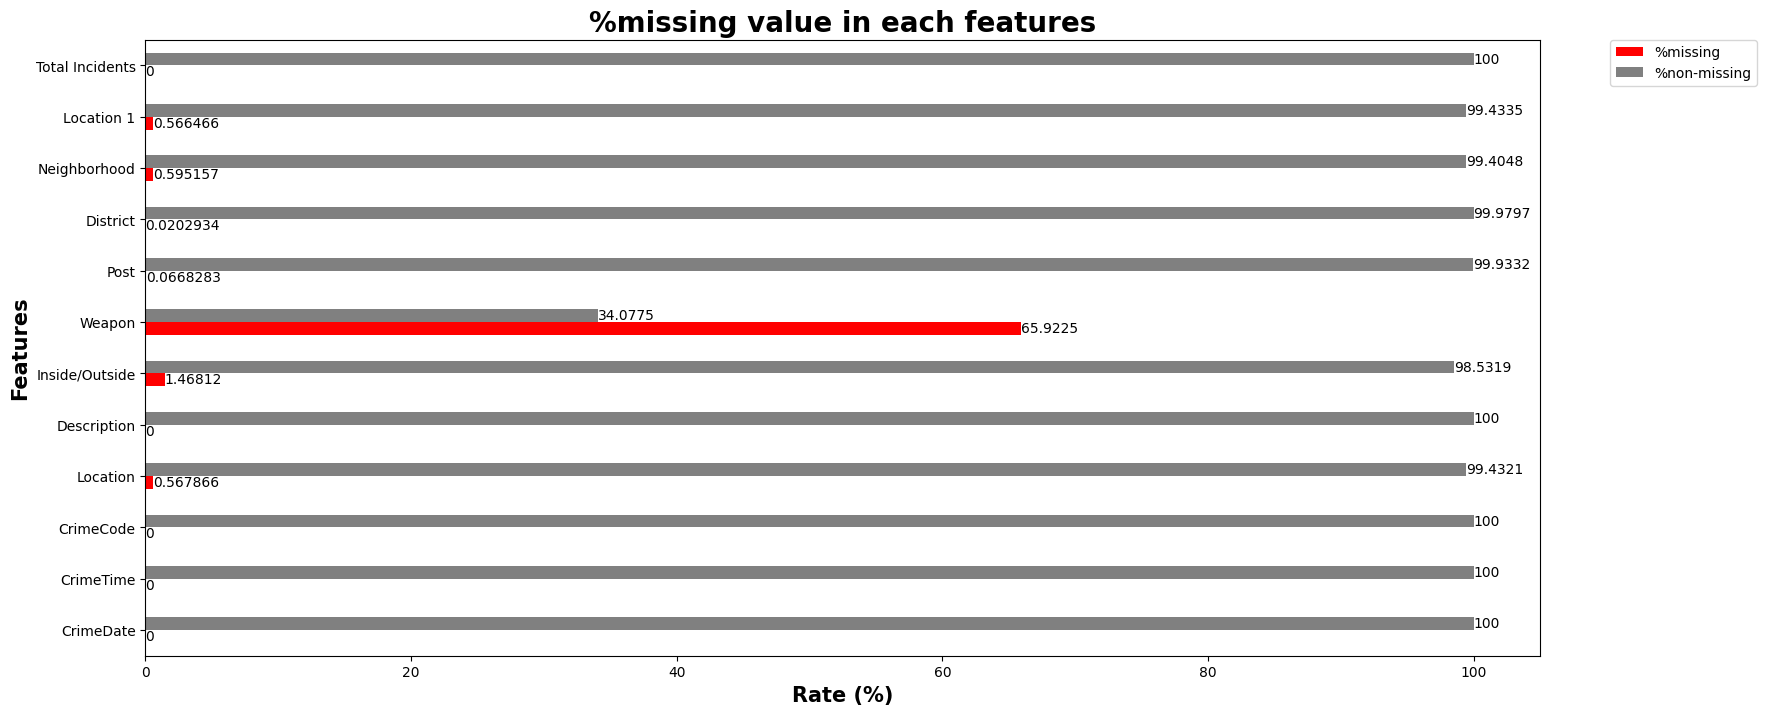

In [16]:
A4 = (8.3, 11.7)
hfigsize = (20,10)
vfigsize = (10,20)
def create_subplots(figsize, row = 1, col = 1):
    return plt.subplots(row, col, figsize = figsize)
fig, ax = create_subplots(figsize = (18,8))
missing_df[['%missing', '%non-missing']].plot.barh(ax = ax, align = 'center', color = ['red','grey'])
plt.ylabel('Features', fontsize = 15, fontweight = 'bold')
plt.xlabel('Rate (%)', fontsize = 15, fontweight = 'bold')
plt.title('%missing value in each features', fontsize = 20, fontweight = 'bold')
for bar in ax.containers:
    ax.bar_label(bar)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

#### __Đánh giá__
+ Có thể thấy, có một vài trường dữ liệu bị thiếu giá trị, tuy nhiên con số là khá thấp chỉ có dưới 1.5%.<br>
+ Trường __Weapon__ có mức độ thiếu dữ liệu tận __66%__. Có thể các vụ phạm tội này, hung thủ không đem theo vụ khí, hoặc không tìm được vũ khí.

## __Các kiểu dữ liệu trong từng Features__

In [17]:
def opened_object_dtype(columns):
    return set(df[columns].apply(lambda x: type(x)))

In [18]:
info_features = {}
for column in df.columns:
    info_features[column] = {
        "datatype": opened_object_dtype(column),
        "unique": df[column].unique(),
        "number unique": df[column].nunique()
    }
info_features_df = pd.DataFrame(info_features)

In [19]:
info_features_df

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Location 1,Total Incidents
datatype,{<class 'pandas._libs.tslibs.timestamps.Timest...,{<class 'str'>},{<class 'str'>},"{<class 'str'>, <class 'float'>}",{<class 'str'>},"{<class 'str'>, <class 'float'>}","{<class 'str'>, <class 'float'>}",{<class 'float'>},"{<class 'str'>, <class 'float'>}","{<class 'str'>, <class 'float'>}","{<class 'str'>, <class 'float'>}",{<class 'int'>}
unique,"[2016-11-12T00:00:00.000000000, 2016-11-11T00:...","[02:35:00, 02:56:00, 03:00:00, 03:45:00, 04:27...","[3B, 3CF, 6D, 6E, 4E, 3CO, 3BJ, 5A, 4B, 7A, 3A...","[300 SAINT PAUL PL, 800 S BROADWAY, 1500 PENTW...","[ROBBERY - STREET, ROBBERY - COMMERCIAL, LARCE...","[O, I, Outside, Inside, nan]","[nan, FIREARM, HANDS, OTHER, KNIFE]","[111.0, 213.0, 413.0, 424.0, 423.0, 933.0, 223...","[CENTRAL, SOUTHEASTERN, NORTHEASTERN, SOUTHERN...","[Downtown, Fells Point, Stonewood-Pentwood-Win...","[(39.2924100000, -76.6140800000), (39.28242000...",[1]
number unique,2143,4236,81,25949,15,4,4,189,13,280,97951,1


Sơ qua, ta có thể thấy rằng cột __Inside/Outside__ có các giá trị I = Inside, và O = Outside.

In [20]:
df['Inside/Outside'] = np.where(df['Inside/Outside'] == 'I', 'Inside', df['Inside/Outside'])
df['Inside/Outside'] = np.where(df['Inside/Outside'] == 'O', 'Outside', df['Inside/Outside'])

Cột __Location 1__ có thêm kiểu dữ liệu _'str'_.

In [21]:
location1 = df['Location 1']
float_value =[]
for value in location1.values:
    if isinstance(value, float):
        float_value.append(value)
print(set(float_value))

{nan}


Như vậy các giá trị tọa độ là các chuỗi __string__. Nếu để các tọa độ ở dạng kiểu dữ liệu  __string__ như thế sẽ rất khó để thực hiện các quá trình trực quan hóa dữ liệu một cách hiệu quả.

#### __Thay đổi kiểu dữ liệu bên trong cột `Inside/Outside`.__

In [22]:
def split_coordinate(coor):
    if(isinstance(coor, float)):
        return coor
    coor = coor.split(', ')
    coor[0] = coor[0][1:]
    coor[1] = coor[1][:-1]
    return set(coor)

df['Location 1'] = df['Location 1'].apply(lambda x: split_coordinate(x))
df = df.rename(columns = {'Location 1': 'Coordinate'})
df

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Coordinate,Total Incidents
0,2016-11-12,02:35:00,3B,300 SAINT PAUL PL,ROBBERY - STREET,Outside,NaN,111.0,CENTRAL,Downtown,"{-76.6140800000, 39.2924100000}",1
1,2016-11-12,02:56:00,3CF,800 S BROADWAY,ROBBERY - COMMERCIAL,Inside,FIREARM,213.0,SOUTHEASTERN,Fells Point,"{-76.5928800000, 39.2824200000}",1
2,2016-11-12,03:00:00,6D,1500 PENTWOOD RD,LARCENY FROM AUTO,Outside,NaN,413.0,NORTHEASTERN,Stonewood-Pentwood-Winston,"{39.3480500000, -76.5883400000}",1
3,2016-11-12,03:00:00,6D,6600 MILTON LN,LARCENY FROM AUTO,Outside,NaN,424.0,NORTHEASTERN,Westfield,"{39.3626300000, -76.5516100000}",1
4,2016-11-12,03:00:00,6E,300 W BALTIMORE ST,LARCENY,Outside,NaN,111.0,CENTRAL,Downtown,"{-76.6197100000, 39.2893800000}",1
...,...,...,...,...,...,...,...,...,...,...,...,...
285802,2011-01-01,22:15:00,4D,6800 MCCLEAN BD,AGG. ASSAULT,Inside,HANDS,423.0,NORTHEASTERN,Hamilton Hills,"{39.3704700000, -76.5670500000}",1
285803,2011-01-01,22:30:00,6J,3000 ODONNELL ST,LARCENY,Inside,NaN,232.0,SOUTHEASTERN,Canton,"{-76.5727300000, 39.2804600000}",1
285804,2011-01-01,23:00:00,7A,2500 ARUNAH AV,AUTO THEFT,Outside,NaN,721.0,WESTERN,Evergreen Lawn,"{39.2954200000, -76.6592800000}",1
285805,2011-01-01,23:25:00,4E,100 N MONROE ST,COMMON ASSAULT,Inside,HANDS,714.0,WESTERN,Penrose/Fayette Street Outreach,"{39.2899900000, -76.6470700000}",1


Để dễ dàng quan sát các dữ liệu theo từng ngày, tháng, năm hơn, cần tạo thêm các cột từ dữ liệu có sẵn.

In [23]:
df[["Year", "Month", "Day"]] = df["CrimeDate"].apply(lambda x: str(x)).str.split("-", expand = True)
df['Day'] = df['Day'].apply(lambda x: x.split(' ')[0])

In [24]:
df

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Coordinate,Total Incidents,Year,Month,Day
0,2016-11-12,02:35:00,3B,300 SAINT PAUL PL,ROBBERY - STREET,Outside,NaN,111.0,CENTRAL,Downtown,"{-76.6140800000, 39.2924100000}",1,2016,11,12
1,2016-11-12,02:56:00,3CF,800 S BROADWAY,ROBBERY - COMMERCIAL,Inside,FIREARM,213.0,SOUTHEASTERN,Fells Point,"{-76.5928800000, 39.2824200000}",1,2016,11,12
2,2016-11-12,03:00:00,6D,1500 PENTWOOD RD,LARCENY FROM AUTO,Outside,NaN,413.0,NORTHEASTERN,Stonewood-Pentwood-Winston,"{39.3480500000, -76.5883400000}",1,2016,11,12
3,2016-11-12,03:00:00,6D,6600 MILTON LN,LARCENY FROM AUTO,Outside,NaN,424.0,NORTHEASTERN,Westfield,"{39.3626300000, -76.5516100000}",1,2016,11,12
4,2016-11-12,03:00:00,6E,300 W BALTIMORE ST,LARCENY,Outside,NaN,111.0,CENTRAL,Downtown,"{-76.6197100000, 39.2893800000}",1,2016,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285802,2011-01-01,22:15:00,4D,6800 MCCLEAN BD,AGG. ASSAULT,Inside,HANDS,423.0,NORTHEASTERN,Hamilton Hills,"{39.3704700000, -76.5670500000}",1,2011,01,01
285803,2011-01-01,22:30:00,6J,3000 ODONNELL ST,LARCENY,Inside,NaN,232.0,SOUTHEASTERN,Canton,"{-76.5727300000, 39.2804600000}",1,2011,01,01
285804,2011-01-01,23:00:00,7A,2500 ARUNAH AV,AUTO THEFT,Outside,NaN,721.0,WESTERN,Evergreen Lawn,"{39.2954200000, -76.6592800000}",1,2011,01,01
285805,2011-01-01,23:25:00,4E,100 N MONROE ST,COMMON ASSAULT,Inside,HANDS,714.0,WESTERN,Penrose/Fayette Street Outreach,"{39.2899900000, -76.6470700000}",1,2011,01,01


__Thông tin các cột__

<table>
    <tr>
        <th>STT</th>
        <th>Tên cột</th>
        <th>Ý nghĩa</th>
    </tr>
    <!-- <tr> -->
        <th>1</th>
        <th>CrimeDate</th>
        <th>Ngày phạm tội</th>
    </tr>
    <tr>
        <th>2</th>
        <th>CrimeTime</th>
        <th>Thời gian phạm tội</th>
    </tr>
    <tr>
        <th>3</th>
        <th>CrimeCode</th>
        <th>Mã phạm tội</th>
    </tr>
    <tr>
        <th>4</th>
        <th>Location</th>
        <th>Địa chỉ nơi phạm tội</th>
    </tr>
    <tr>
        <th>5</th>
        <th>Description</th>
        <th>Mô tả cách phạm tội</th>
    </tr>
    <tr>
        <th>6</th>
        <th>Inside/Outside</th>
        <th>Vụ phạm tội xảy ra ở trong nhà hay ngoài nhà</th>
    </tr>
    <tr>
        <th>7</th>
        <th>Weapon</th>
        <th>Hung khí sử dụng</th>
    </tr>
    <tr>
        <th>8</th>
        <th>Post</th>
        <th>Số tiền bồi thường</th>
    </tr>
    <tr>
        <th>9</th>
        <th>District</th>
        <th>Phía của thành phố Baltimore</th>
    </tr>
    <tr>
        <th>10</th>
        <th>Neighborhood</th>
        <th>Vị trí lân cận</th>
    </tr>
    <tr>
        <th>11</th>
        <th>Coordinate</th>
        <th>Tọa độ nơi xảy ra vụ phạm tội</th>
    </tr>
    <tr>
        <th>12</th>
        <th>Total Incidents</th>
        <th>Tổng số sự cố</th>
    </tr>   
</table>

## __Số lượng vụ phạm tội xảy ra trong từng năm__

Quan sát trong từng năm, kiểm tra số vụ phạm tội xảy ra

In [25]:
yearCrime_df = df['Year'].value_counts().to_frame(name = 'count')
yearCrime_df['Growth'] = yearCrime_df['count'].pct_change(periods=1)
yearCrime_df['Growth'].iloc[(0)] = 0
yearCrime_df

,count,Growth
2011,50651,0.000000
2012,49561,-0.021520
2013,49542,-0.000383
2015,48806,-0.014856
2014,45958,-0.058353
2016,41289,-0.101593


In [26]:
barcolor = []
maxCount = yearCrime_df['count'].max()
minCount = yearCrime_df['count'].min()

for c in yearCrime_df['count'].values:
    if c == maxCount:
        barcolor.append('red')
    elif (c == minCount):
        barcolor.append('green')
    else:
        barcolor.append('grey')

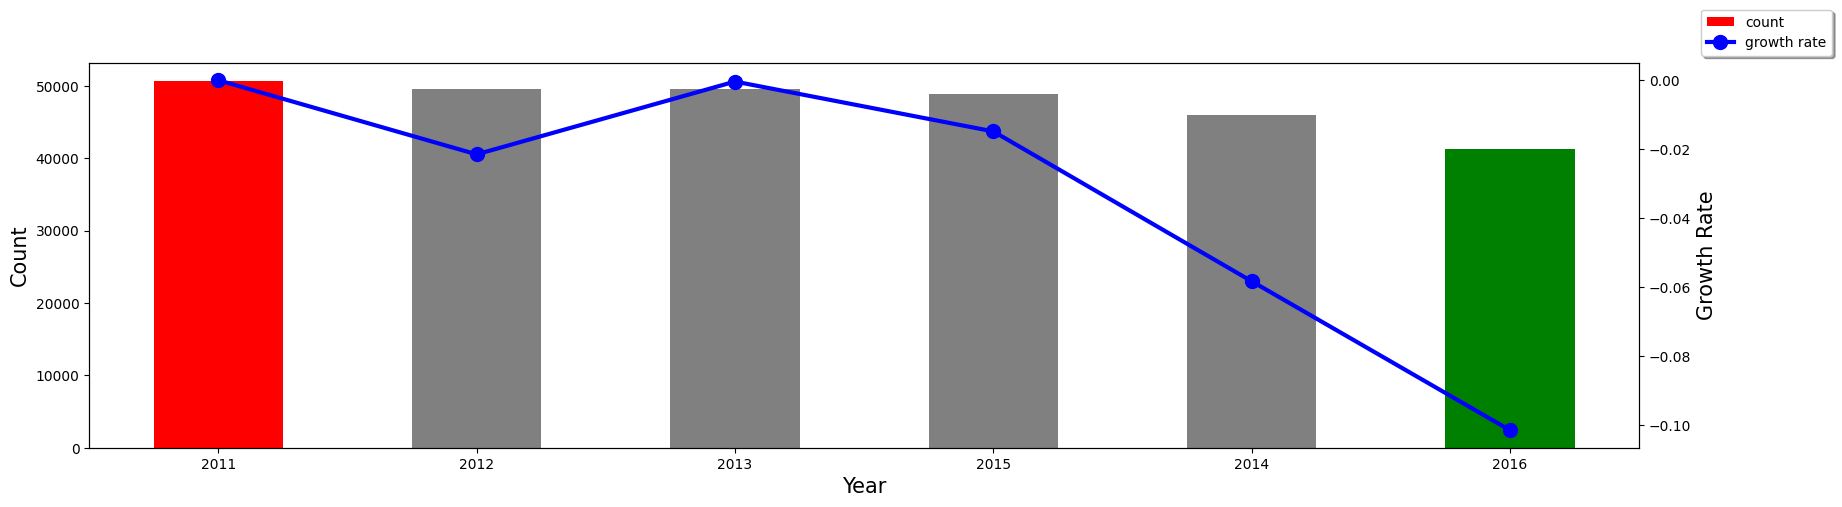

In [27]:
fig, ax = plt.subplots(figsize = (20,5))
bar = yearCrime_df['count'].plot.bar(ax = ax, rot = 0, color = barcolor)
ax2 = ax.twinx()
line = yearCrime_df['Growth'].plot.line(ax = ax2, color = 'blue', linewidth = 3, marker = 'o', markersize = 10)
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Count', fontsize =15)
ax2.set_ylabel('Growth Rate', fontsize =15)
fig.legend([bar, line], labels = ['count', 'growth rate'], bbox_to_anchor=(1, 1), shadow = True)
# fig.legends[0].set_title('Legend')
plt.show()

__Đánh giá__
+ Năm có nhiều vụ phạm tội nhất là vào năm __2011__, và thấp nhất vào năm __2016__.
+ Có thể nói các vụ phạm tội qua các năm có sự suy giảm, tuy không đáng kể, nhưng có thể nói đã có sự phát triển trong việc kiểm soát của chính quyền thành phố Baltimore.
+ Năm __2016__ cho thấy được mức độ giảm các vụ phạm tội là rõ rệt nhất với tỉ lệ giảm hơn 10% so với năm 2014

## Mức độ xảy ra tai nạn mỗi tuần.

Khi quan sát dữ liệu `CrimeTime` ta có thể thấy có một vài dòng dữ liệu có format sai. Ta sẽ sửa lại cột này bằng cách chỉ lấy giờ chuẩn xảy xa phạm tội. Đồng thời gom tổng các vụ phạm tội theo thời gian xảy ra trong tuần vào dataframe mới là `Crime_Weekdays_df`.

In [28]:
df['Day of Week'] = df['CrimeDate'].astype('datetime64[ns]').dt.day_name()
df['CrimeTime'] = pd.to_datetime(df['CrimeTime'], format='%H', exact=False).astype(str).str[11:16]
df['Hour'] = df['CrimeTime'].astype('datetime64[ns]').dt.hour
WeekDays = ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday','Monday']
Hours = np.arange(24)
gb = df.groupby(['Day of Week', 'Hour']).size()
Crime_Weekdays_df = pd.DataFrame(columns = WeekDays, index= Hours)
for col in WeekDays:
    Crime_Weekdays_df[col] = [x for x in gb[col]]
df = df.drop(columns= ['Day of Week','Hour'])
Crime_Weekdays_df.head()

,Sunday,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday
0,2103,2174,1744,1613,1510,1616,1740
1,2308,2200,1644,1515,1409,1458,1520
2,1955,1833,999,927,927,903,1037
3,1281,1147,734,687,712,684,716
4,850,851,584,528,499,488,574


Trực quan hóa từ `Crime_Weekdays_df`.

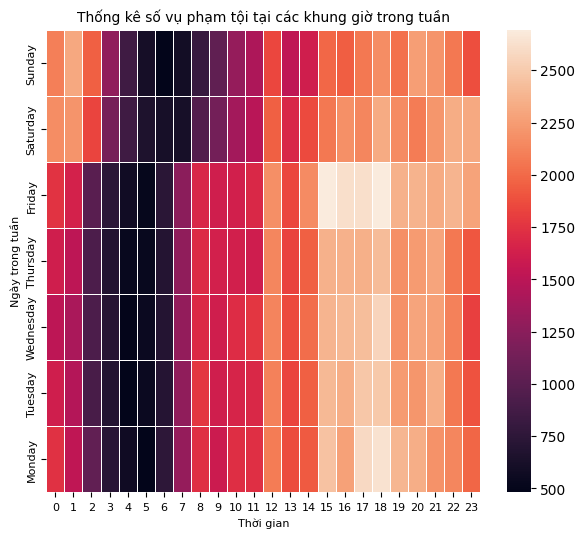

In [29]:
ax = plt.axes()
sns.heatmap(Crime_Weekdays_df.T, linewidth=.5, ax=ax)
ax.set_title('Thống kê số vụ phạm tội tại các khung giờ trong tuần')
ax.set_ylabel('Ngày trong tuần')
ax.set_xlabel('Thời gian')
ax.title.set_fontsize(10)
plt.setp(ax.get_xticklabels(), rotation= 0, fontsize = 8)
plt.setp(ax.get_yticklabels(), rotation= 90, fontsize = 8)
ax.xaxis.label.set_fontsize(8)
ax.yaxis.label.set_fontsize(8)
ax.figure.set_figheight(6)
ax.figure.set_figwidth(7)
plt.show()

Như đồ thị `heat-map` ở trên, ta có thể thấy:
- Khung giờ hoạt động phổ biến nhất của tội phạm là từ 14h - 23h các ngày từ thứ hai đến thứ 6.
- Riêng các ngày cuối tuần, các hoạt động phạm tội còn diễn ra vào rạng sáng từ 0h đến 3h.
- Quan sát kỹ thêm vào biểu đồ, vào 12h các ngày trong tuần cũng xảy ra khá nhiều tội phạm.
- Giải thích cho điều này, các khung giờ trên là khung giờ đặc biệt trong tuần khi có đông đúc người. Nó là cơ sở tốt khi tội phạm có khả năng hoạt động tốt nhất lúc đông người. Ngoài ra, vào giờ khuya của các ngày nghỉ, số lượng phạm tội cũng thay đổi bởi thời điểm này là thời điểm mà lực lượng công an ít hoạt động cũng như người dân đi khuya ít được bảo vệ tốt nhất.

## Xu hướng phạm tội tại mỗi tháng và thay đổi trong số tiền bồi thường qua các năm.

In [36]:
gb_total = df.groupby(['Year', 'Month']).size()
gb_post = df.groupby(['Year', 'Month'])['Post'].mean()
gb_post.unstack(level='Month')

Month,01,02,03,04,05,06,07,08,09,10,11,12
Year,,,,,,,,,,,,
2011,516.437791,491.202059,512.134521,501.345709,507.258636,494.734583,500.688732,499.526350,494.025360,500.939061,503.873214,507.641013
2012,522.919750,509.646603,500.932791,501.214034,506.738111,485.752037,479.188123,487.935977,495.002377,500.837793,503.270561,502.797318
2013,504.505777,498.336250,495.255021,491.283672,509.347572,493.926824,494.805183,499.452716,521.687678,508.817629,511.671630,511.498678
2014,505.479332,505.547215,518.615340,510.991747,510.933029,499.669489,504.658717,504.471159,526.605360,502.540252,508.183887,501.985107
2015,505.555893,499.374340,510.436980,502.958739,503.867890,508.361774,500.783596,503.604400,495.621043,499.167103,494.710831,512.660213
2016,512.957181,505.128656,504.845867,499.696412,511.712453,519.561870,517.059833,518.336852,506.136374,508.123581,500.092646,NaN


Có vẻ như dữ liệu năm 2016 chưa được hoàn thiện khi tháng 11 số lượng phạm tội có chênh lệch rất lớn so với các tháng còn lại cũng như chưa có cập nhật nào cho tháng 12. Ta sẽ thực hiện loại bỏ các tháng cuối năm này để có thể rút ra nhận xét từng tháng của mỗi năm từ đó đưa ra phương hướng dự đoán tốt nhất có số liệu bị thiếu này.

In [37]:
Crime_Months_df = gb_total.unstack(level='Month').T
Crime_Post_df = gb_post.unstack(level= 'Month').T
for year in Crime_Months_df.columns:
    Crime_Months_df.loc[Crime_Months_df[year] <= 2000 , year] = np.nan

Crime_Months_df

Year,2011,2012,2013,2014,2015,2016
Month,,,,,,
01,3440.0,3838.0,3809.0,3653.0,3623.0,3384.0
02,3108.0,3358.0,3200.0,2891.0,2650.0,2873.0
03,4269.0,4302.0,3635.0,3442.0,3365.0,3618.0
04,4149.0,3979.0,3987.0,3756.0,3908.0,3847.0
05,4516.0,4648.0,4449.0,4166.0,4434.0,4225.0
06,4427.0,4296.0,4415.0,4016.0,4656.0,4406.0
07,4669.0,4412.0,4477.0,4196.0,4776.0,4087.0
08,4574.0,4514.0,4621.0,4126.0,4654.0,4225.0
09,4377.0,4207.0,4222.0,4071.0,4408.0,4430.0


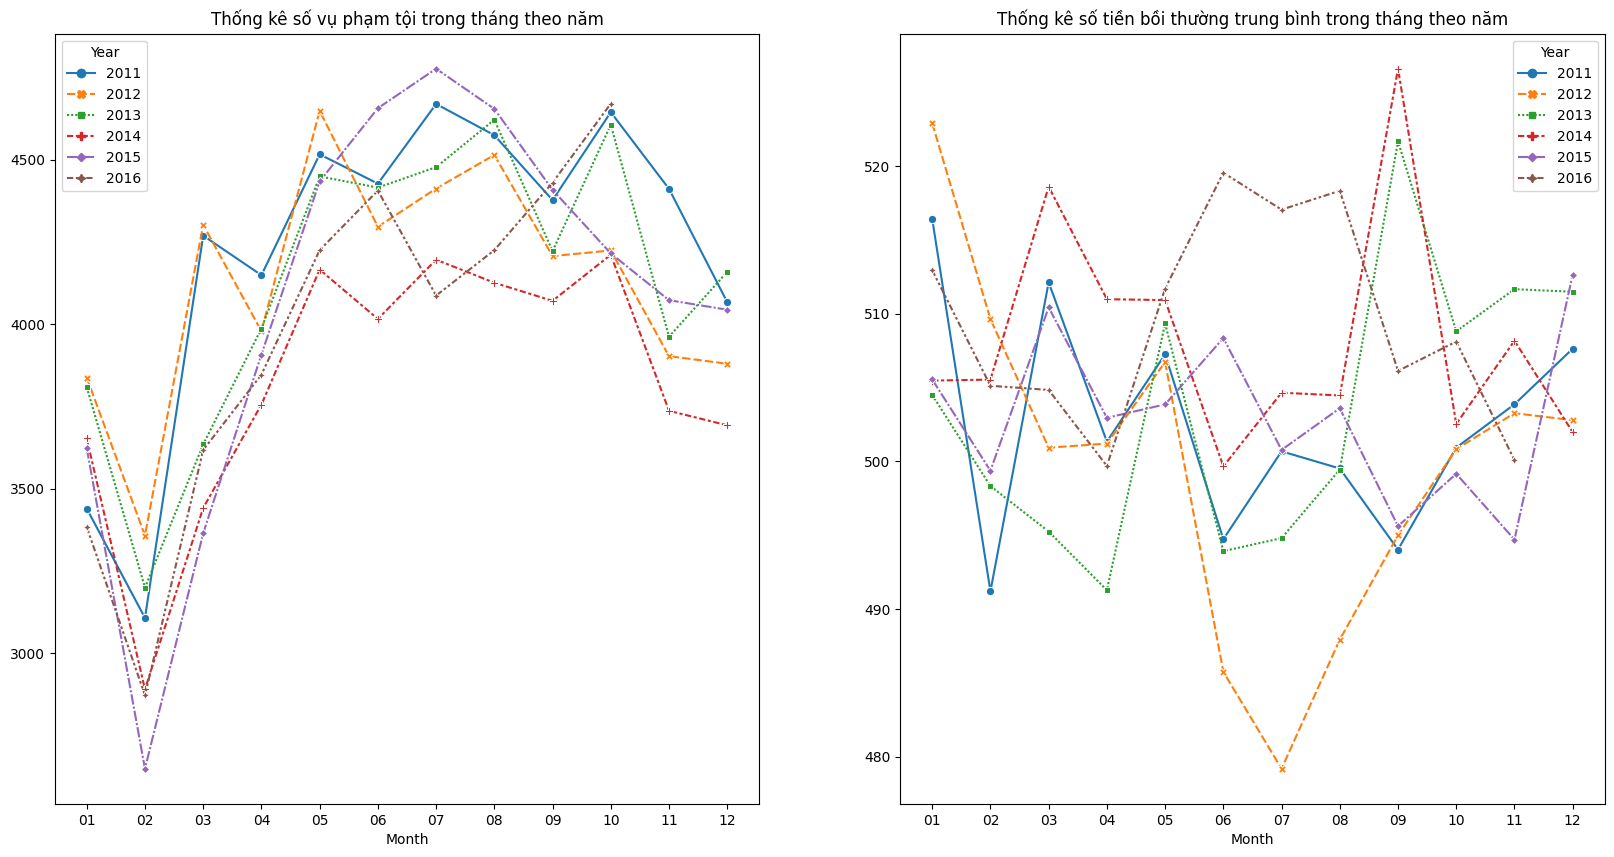

In [38]:
fig, ax = plt.subplots(1, 2 , figsize = (20, 10))
sns.lineplot(data = Crime_Months_df, ax = ax[0], markers= True)
sns.lineplot(data = Crime_Post_df, ax = ax[1], markers= True)
ax[0].set_title('Thống kê số vụ phạm tội trong tháng theo năm')
ax[1].set_title('Thống kê số tiền bồi thường trung bình trong tháng theo năm')
plt.show()

- **Theo biểu đồ bên trái:**
    - Ta thấy tháng 2 rất đặc biệt so với những tháng còn lại khi tại tháng này, số lượng tội phạm năm nào cũng ít hẳn so với các tháng khác.
    - Từ tháng 5 đến tháng 10, các vụ phạm tội nhìn chung tăng và giảm dần vào các tháng cuối năm. Đặc biệt tình hình tội phạm tăng cao lại vào tháng 7 và tháng 10.
    - So với năm 2014 khi mà số vụ phạm tội thấp nhất thì một năm sau đó, tức 2015, tội phạm lại hoạt động nhiều hơn hẳn, đỉnh điểm tháng 7/2015 vượt trội hơn so với những năm trong quá khứ.
    - Năm 2016 đặc biệt hơn so với các năm khác khi tháng 7 lại đột ngột giảm mạnh và tăng trở lại vào tháng 10.
- **Từ những nhận định trên, ta quan sát biểu đồ bên phải vào các tháng đặc biệt là tháng 7 và tháng 10:**
    - Tháng 7 có nhiều tội phạm nhưng nhìn chung số tiền bồi thường không quá chênh lệch nhau qua các năm, riêng có năm 2012, số tiền trung bình thụt sâu chứng tỏ số vụ phạm tội nhiều nhưng không quá nghiêm trọng.
    - Ngược lại vào tháng 10, năm 2014 được nhận định có ít tội phạm nhất so với các năm, nhưng số tiền xử phạt lại cao hơn hẳn, chứng tỏ năm 2014 có số vụ phạm tội nặng nhiều.
- ***Qua 2 biểu đồ, dựa vào biểu đồ 1 ta có thể phần nào dự đoán được phần nào tình hình cuối năm của 2016 khi nhìn chung cuối mỗi năm đều có chiều hướng đi xuống so với tháng trước. Nhưng dự đoán về mức phạt trung bình có vẻ khó hơn khi biến động mỗi năm là khác nhau.***